# Análise Exploratória

In [97]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Carregar datasets

In [98]:
# Carregar os datasets
sinistros = pd.read_csv(r"data\sinistros_2022-2025_bauru.csv", sep=";")
pessoas = pd.read_csv(r"data\pessoas_2022-2025_bauru.csv", sep=";")
veiculos = pd.read_csv(r"data\veiculos_2022-2025_bauru.csv", sep=";")

In [99]:
sinistros.head(10)

,id_sinistro,tipo_registro,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,hora_sinistro,logradouro,numero_logradouro,tipo_via,latitude,longitude,municipio,regiao_administrativa,tp_veiculo_bicicleta,tp_veiculo_caminhao,tp_veiculo_motocicleta,tp_veiculo_nao_disponivel,tp_veiculo_onibus,tp_veiculo_outros,tp_veiculo_automovel,gravidade_nao_disponivel,gravidade_leve,gravidade_fatal,gravidade_ileso,gravidade_grave,administracao,conservacao,jurisdicao,tipo_acidente_primario,tp_sinistro_atropelamento,tp_sinistro_colisao_frontal,tp_sinistro_colisao_traseira,tp_sinistro_colisao_lateral,tp_sinistro_colisao_transversal,tp_sinistro_colisao_outros,tp_sinistro_choque,tp_sinistro_capotamento,tp_sinistro_engavetamento,tp_sinistro_tombamento,tp_sinistro_outros,tp_sinistro_nao_disponivel
0,2221925,NOTIFICACAO,01/01/2022,2022,1,1,2022/01,04:22,AVENIDA PINHEIRO MACHADO,1.0,VIAS MUNICIPAIS,"-22,31817024","-49,11414784",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N
1,2179948,NOTIFICACAO,01/01/2022,2022,1,1,2022/01,04:09,RUA ÂNGELO PASCHOAL,1.0,VIAS MUNICIPAIS,"-22,30523809","-49,09794557",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N
2,2118232,SINISTRO NAO FATAL,01/01/2022,2022,1,1,2022/01,04:20,ALAMEDA COPÉRNICO,0.0,VIAS MUNICIPAIS,"-22,30645978","-49,10445329",BAURU,Bauru,0,0,1,0,0,0,0,0,1,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N
3,1610119,NOTIFICACAO,02/01/2022,2022,1,2,2022/01,19:36,RUA MANOEL RODRIGUES MADURO,404.0,VIAS MUNICIPAIS,"-22,31234912","-49,12226505",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N
4,1707978,SINISTRO NAO FATAL,02/01/2022,2022,1,2,2022/01,20:53,RUA JÚLIO DE MESQUITA FILHO,0.0,VIAS MUNICIPAIS,"-22,3381656","-49,05324406",BAURU,Bauru,0,0,1,0,0,0,1,1,2,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N
5,1561266,NOTIFICACAO,02/01/2022,2022,1,2,2022/01,18:38,RUA BENEDITO JOSÉ TEIXEIRA,2.0,VIAS MUNICIPAIS,"-22,30205094","-49,09467349",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N
6,1305976,SINISTRO NAO FATAL,03/01/2022,2022,1,3,2022/01,13:39,ALAMEDA DOUTOR OTÁVIO PINHEIRO BRISOLA,18.0,VIAS MUNICIPAIS,"-22,32913966","-49,06527721",BAURU,Bauru,0,0,1,1,0,0,0,1,1,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,N,S,N,N,N,N,N,S,N
7,1572822,SINISTRO NAO FATAL,03/01/2022,2022,1,3,2022/01,17:33,AVENIDA NAÇÕES UNIDAS,800.0,VIAS MUNICIPAIS,"-22,32564504","-49,06364881",BAURU,Bauru,0,0,1,0,1,0,0,1,1,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,N,S,N,N,N,N,N,S,N
8,2352211,NOTIFICACAO,03/01/2022,2022,1,3,2022/01,07:05,SPERANCA,0.0,VIAS MUNICIPAIS,"-22,31173741","-49,0725742",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N
9,1973038,SINISTRO NAO FATAL,03/01/2022,2022,1,3,2022/01,06:59,SPERANCA,1.0,VIAS MUNICIPAIS,"-22,30799927","-49,08120344",BAURU,Bauru,0,0,2,0,0,0,0,0,2,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N


In [100]:
pessoas.head(10)

,id_sinistro,municipio,tipo_via,tipo_veiculo_vitima,sexo,idade,data_obito,gravidade_lesao,tipo_vitima,faixa_etaria_demografica,faixa_etaria_legal,profissao,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,ano_obito,mes_obito,dia_obito,ano_mes_obito
0,2077939,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,56,1900-01-01,LEVE,NAO DISPONIVEL,55 a 59,55-59,PADEIRO(A),09/01/2022,2022,1,9,2022/01,-1,-1,-1,1900/01
1,1759996,BAURU,RODOVIAS,NAO DISPONIVEL,MASCULINO,49,1900-01-01,LEVE,CONDUTOR,45 a 49,45-49,FARMACEUTICO(A),22/01/2022,2022,1,22,2022/01,-1,-1,-1,1900/01
2,1758058,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,FEMININO,25,1900-01-01,LEVE,NAO DISPONIVEL,25 a 29,25-29,PROFESSOR(A),22/01/2022,2022,1,22,2022/01,-1,-1,-1,1900/01
3,2118232,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,24,1900-01-01,LEVE,NAO DISPONIVEL,20 a 24,18-24,OUTRA,01/01/2022,2022,1,1,2022/01,-1,-1,-1,1900/01
4,2196881,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,67,1900-01-01,LEVE,NAO DISPONIVEL,65 a 69,65-69,APOSENTADO(A),05/01/2022,2022,1,5,2022/01,-1,-1,-1,1900/01
5,1301638,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,44,1900-01-01,LEVE,NAO DISPONIVEL,40 a 44,40-44,OUTRA,07/01/2022,2022,1,7,2022/01,-1,-1,-1,1900/01
6,2131738,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,25,1900-01-01,NAO DISPONIVEL,NAO DISPONIVEL,25 a 29,25-29,NAO DISPONIVEL,10/01/2022,2022,1,10,2022/01,-1,-1,-1,1900/01
7,2043785,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,FEMININO,19,1900-01-01,LEVE,CONDUTOR,15 a 19,18-24,AUXILIAR DE COBRANCA,14/01/2022,2022,1,14,2022/01,-1,-1,-1,1900/01
8,1448572,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,32,1900-01-01,LEVE,NAO DISPONIVEL,30 a 34,30-34,FUNILEIRO(A),15/01/2022,2022,1,15,2022/01,-1,-1,-1,1900/01
9,1965056,BAURU,RODOVIAS,NAO DISPONIVEL,FEMININO,23,1900-01-01,LEVE,CONDUTOR,20 a 24,18-24,OUTRA,04/01/2022,2022,1,4,2022/01,-1,-1,-1,1900/01


In [101]:
veiculos.head(10)

,id_sinistro,ano_fab,ano_modelo,cor_veiculo,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,tipo_veiculo
0,2118232,2020,2020,VERMELHO,01/01/2022,2022,1,1,2022/01,MOTOCICLETA
1,1707978,2011,2012,PRATA,02/01/2022,2022,1,2,2022/01,AUTOMOVEL
2,1707978,2014,2014,PRETA,02/01/2022,2022,1,2,2022/01,MOTOCICLETA
3,1572822,2019,2020,PRATA,03/01/2022,2022,1,3,2022/01,ONIBUS
4,1572822,2018,2018,VERMELHO,03/01/2022,2022,1,3,2022/01,MOTOCICLETA
5,1305976,2010,2011,PRATA,03/01/2022,2022,1,3,2022/01,MOTOCICLETA
6,1305976,0,0,NAO DISPONIVEL,03/01/2022,2022,1,3,2022/01,NAO DISPONIVEL
7,1973038,2010,2010,VERMELHO,03/01/2022,2022,1,3,2022/01,MOTOCICLETA
8,1973038,2012,2012,PRATA,03/01/2022,2022,1,3,2022/01,MOTOCICLETA
9,2064149,2013,2013,PRETA,04/01/2022,2022,1,4,2022/01,AUTOMOVEL


## Merge de todos os dados

In [102]:
dados_completos = sinistros.merge(pessoas, on="id_sinistro", how="left")
dados_completos = dados_completos.merge(veiculos, on="id_sinistro", how="left")
dados_completos.head(10)

,id_sinistro,tipo_registro,data_sinistro_x,ano_sinistro_x,mes_sinistro_x,dia_sinistro_x,ano_mes_sinistro_x,hora_sinistro,logradouro,numero_logradouro,tipo_via_x,latitude,longitude,municipio_x,regiao_administrativa,tp_veiculo_bicicleta,tp_veiculo_caminhao,tp_veiculo_motocicleta,tp_veiculo_nao_disponivel,tp_veiculo_onibus,tp_veiculo_outros,tp_veiculo_automovel,gravidade_nao_disponivel,gravidade_leve,gravidade_fatal,gravidade_ileso,gravidade_grave,administracao,conservacao,jurisdicao,tipo_acidente_primario,tp_sinistro_atropelamento,tp_sinistro_colisao_frontal,tp_sinistro_colisao_traseira,tp_sinistro_colisao_lateral,tp_sinistro_colisao_transversal,tp_sinistro_colisao_outros,tp_sinistro_choque,tp_sinistro_capotamento,tp_sinistro_engavetamento,tp_sinistro_tombamento,tp_sinistro_outros,tp_sinistro_nao_disponivel,municipio_y,tipo_via_y,tipo_veiculo_vitima,sexo,idade,data_obito,gravidade_lesao,tipo_vitima,faixa_etaria_demografica,faixa_etaria_legal,profissao,data_sinistro_y,ano_sinistro_y,mes_sinistro_y,dia_sinistro_y,ano_mes_sinistro_y,ano_obito,mes_obito,dia_obito,ano_mes_obito,ano_fab,ano_modelo,cor_veiculo,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,tipo_veiculo
0,2221925,NOTIFICACAO,01/01/2022,2022,1,1,2022/01,04:22,AVENIDA PINHEIRO MACHADO,1.0,VIAS MUNICIPAIS,"-22,31817024","-49,11414784",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2179948,NOTIFICACAO,01/01/2022,2022,1,1,2022/01,04:09,RUA ÂNGELO PASCHOAL,1.0,VIAS MUNICIPAIS,"-22,30523809","-49,09794557",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2118232,SINISTRO NAO FATAL,01/01/2022,2022,1,1,2022/01,04:20,ALAMEDA COPÉRNICO,0.0,VIAS MUNICIPAIS,"-22,30645978","-49,10445329",BAURU,Bauru,0,0,1,0,0,0,0,0,1,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,24.0,1900-01-01,LEVE,NAO DISPONIVEL,20 a 24,18-24,OUTRA,01/01/2022,2022.0,1.0,1.0,2022/01,-1.0,-1.0,-1.0,1900/01,2020.0,2020.0,VERMELHO,01/01/2022,2022.0,1.0,1.0,2022/01,MOTOCICLETA
3,1610119,NOTIFICACAO,02/01/2022,2022,1,2,2022/01,19:36,RUA MANOEL RODRIGUES MADURO,404.0,VIAS MUNICIPAIS,"-22,31234912","-49,12226505",BAURU,Bauru,0,0,0,0,0,0,0,0,0,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,OUTROS,N,N,N,N,N,N,N,N,N,N,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1707978,SINISTRO NAO FATAL,02/01/2022,2022,1,2,2022/01,20:53,RUA JÚLIO DE MESQUITA FILHO,0.0,VIAS MUNICIPAIS,"-22,3381656","-49,05324406",BAURU,Bauru,0,0,1,0,0,0,1,1,2,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,FEMININO,28.0,1900-01-01,LEVE,CONDUTOR,25 a 29,25-29,VENDEDOR(A),02/01/2022,2022.0,1.0,2.0,2022/01,-1.0,-1.0,-1.0,1900/01,2011.0,2012.0,PRATA,02/01/2022,2022.0,1.0,2.0,2022/01,AUTOMOVEL
5,1707978,SINISTRO NAO FATAL,02/01/2022,2022,1,2,2022/01,20:53,RUA JÚLIO DE MESQUITA FILHO,0.0,VIAS MUNICIPAIS,"-22,3381656","-49,05324406",BAURU,Bauru,0,0,1,0,0,0,1,1,2,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,FEMININO,28.0,1900-01-01,LEVE,CONDUTOR,25 a 29,25-29,VENDEDOR(A),02/01/2022,2022.0,1.0,2.0,2022/01,-1.0,-1.0,-1.0,1900/01,2014.0,2014.0,PRETA,02/01/2022,2022.0,1.0,2.0,2022/01,MOTOCICLETA
6,1707978,SINISTRO NAO FATAL,02/01/2022,2022,1,2,2022/01,20:53,RUA JÚLIO DE MESQUITA FILHO,0.0,VIAS MUNICIPAIS,"-22,3381656","-49,05324406",BAURU,Bauru,0,0,1,0,0,0,1,1,2,0,0,0,PREFEITURA,PREFEITURA,MUNICIPAL,COLISAO,N,N,N,S,N,N,N,N,N,N,N,N,BAURU,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,30.0,1900-01-01,LEVE,NAO DISPONIVEL,30 a 34,30-34,CORRETOR(A) DE IMOVEIS,02/01/2022,2

## Heatmap

<Axes: >

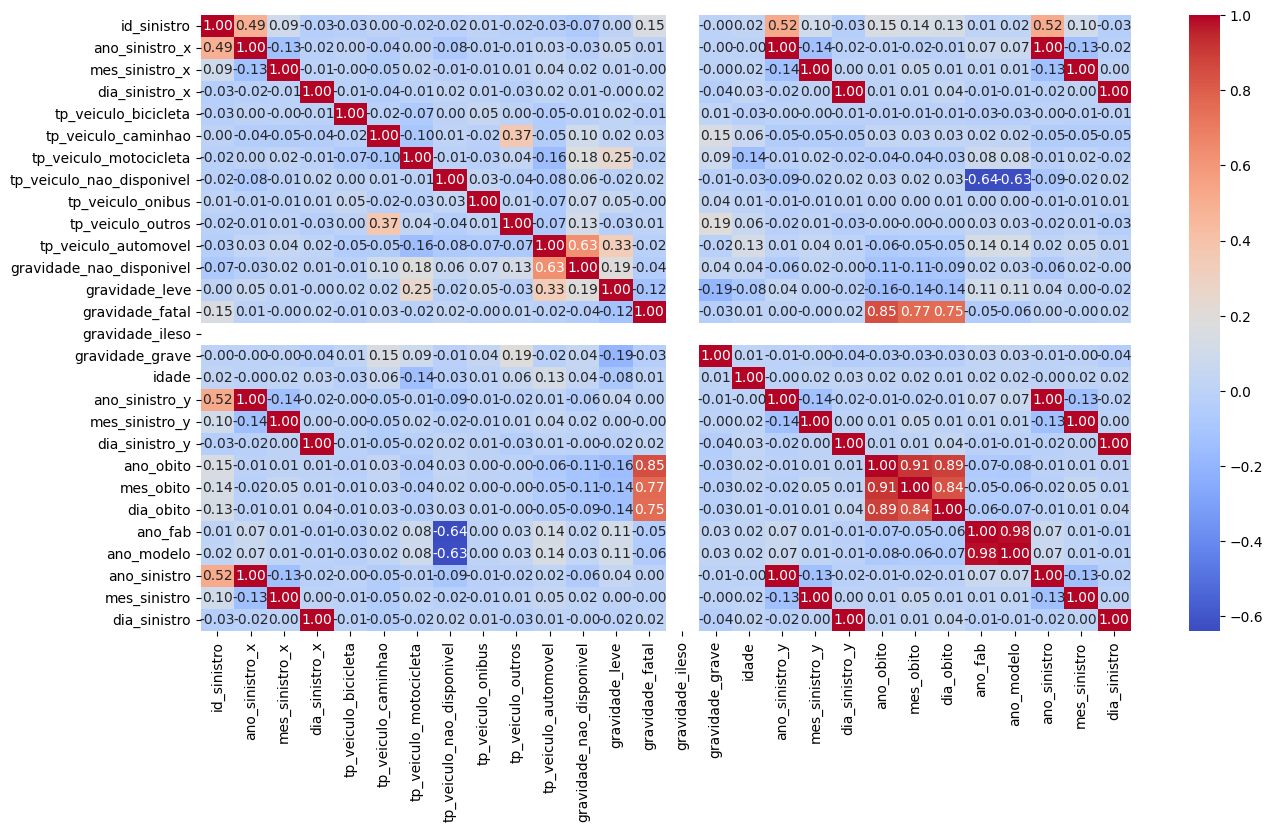

In [103]:
plt.figure(figsize=(15,8))
df_numerico = dados_completos.select_dtypes(include = ['number'])
corr_dados = df_numerico.corr()
sns.heatmap(corr_dados, cmap='coolwarm', annot=True, fmt='.2f')

## Acidentes ao longo do tempo

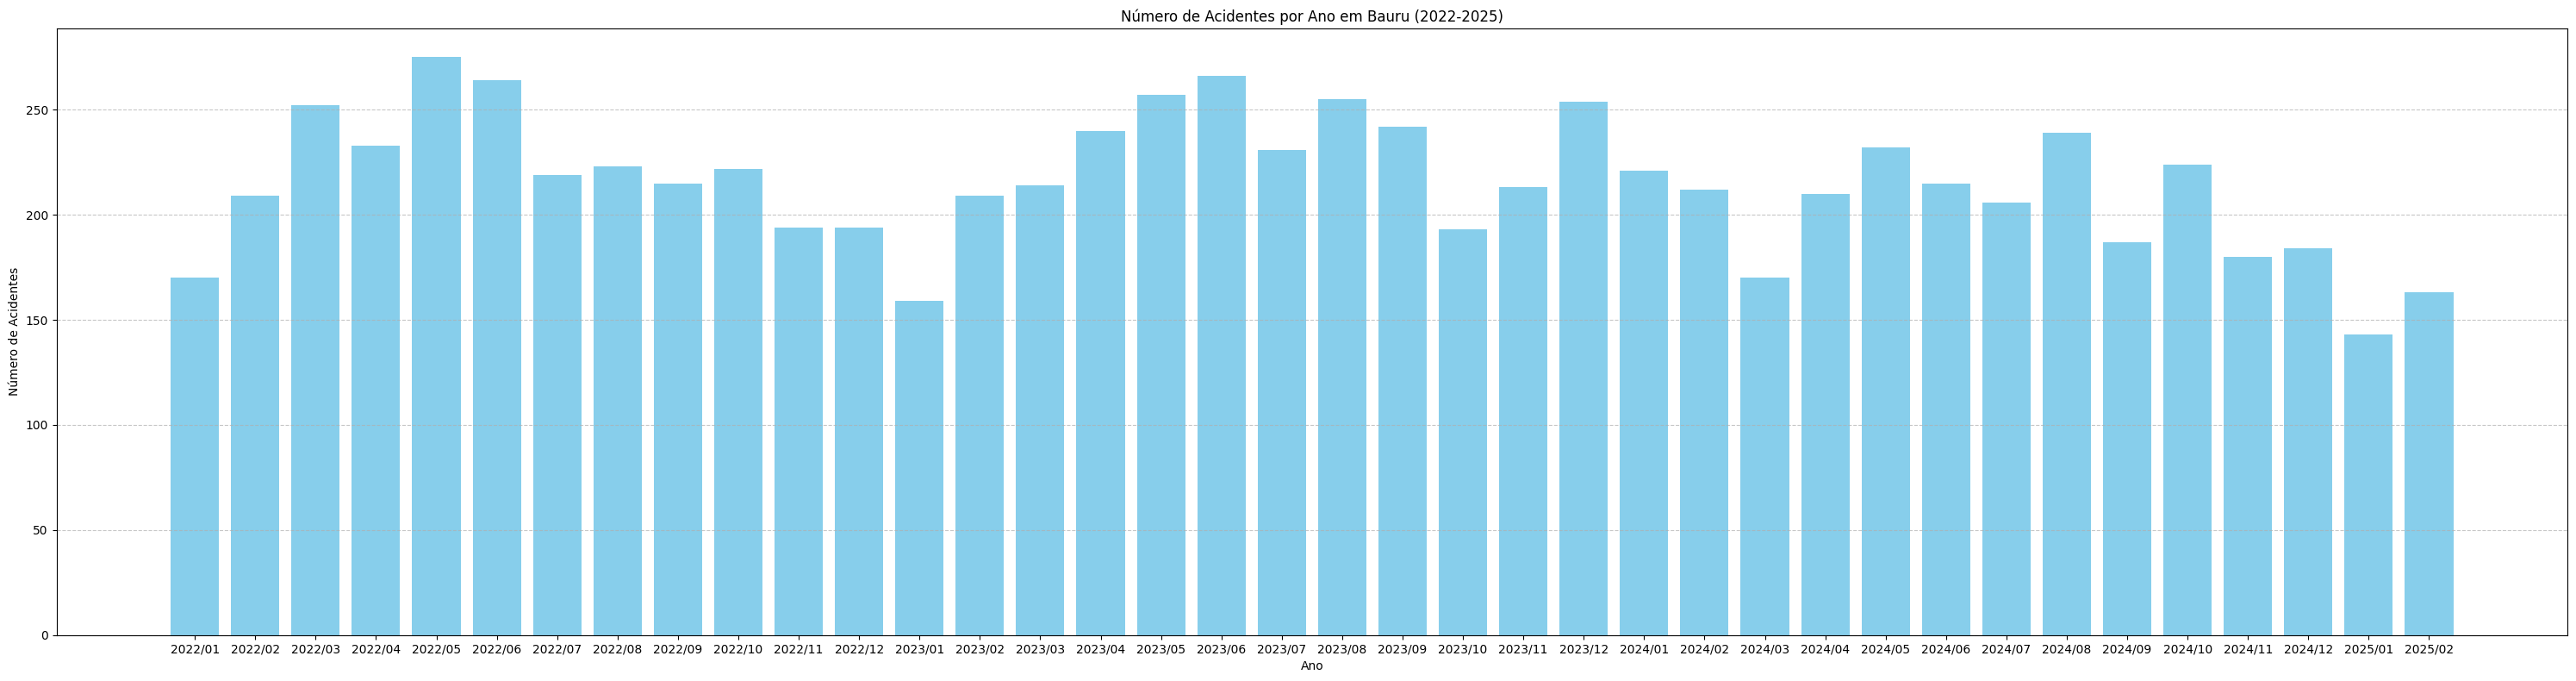

In [104]:
acidentes = sinistros.copy()
acidentes = acidentes.groupby("ano_mes_sinistro")["id_sinistro"].nunique().reset_index(name='num_acidentes')
#print(acidentes)

# Criar o gráfico de barras
plt.figure(figsize=(30, 8))
plt.bar(acidentes["ano_mes_sinistro"], acidentes["num_acidentes"], color="skyblue")
plt.xlabel("Ano")
plt.ylabel("Número de Acidentes")
plt.title("Número de Acidentes por Ano em Bauru (2022-2025)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Certa redução de acidente no começo dos anos
- Certo aumento de acidentes no meio dos anos
- Padrão parece ter mudado em 2024

## Distribuição nos dias da semana

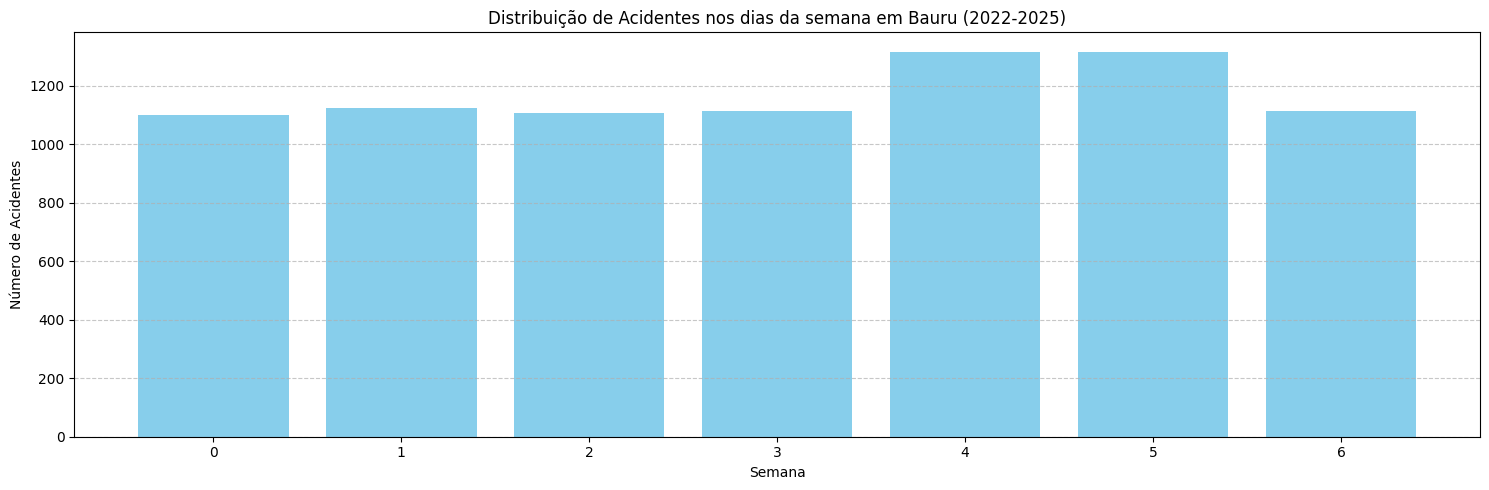

In [105]:
dist_semana = sinistros.copy()

# Garante que esta em datetime
dist_semana["data_sinistro"] = pd.to_datetime(dist_semana["data_sinistro"], format="%d/%m/%Y")

# Extrai dia da semana (0 = segunda, 6 = domingo)
dist_semana['dia_semana'] = dist_semana["data_sinistro"].dt.dayofweek

dist_semana = dist_semana.groupby("dia_semana").size().reset_index(name="num_acidentes")

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))
plt.bar(dist_semana["dia_semana"], dist_semana["num_acidentes"], color="skyblue")
plt.xlabel("Semana")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes nos dias da semana em Bauru (2022-2025)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Aumento de aproximadamente 20% do índice de acidentes na sexta-feira e no sábado

## Distribuição nos horários ao longo de um dia

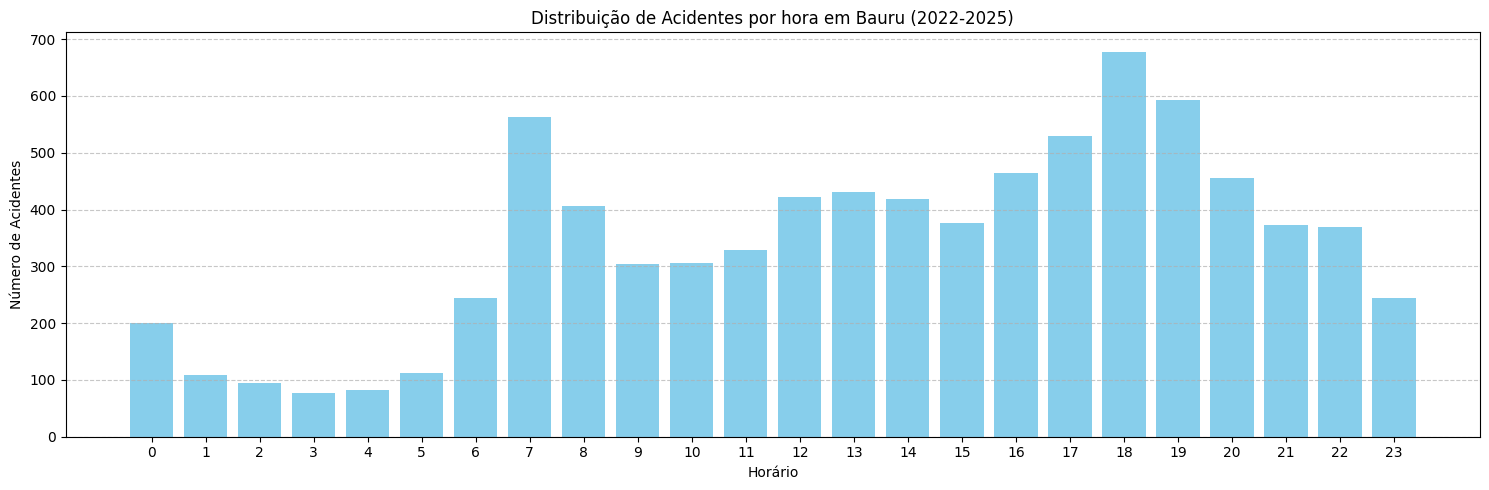

In [106]:
dist_hora = sinistros.copy()

# Condicional para ignorar "99:99"
mask = dist_hora["hora_sinistro"] != "99:99"
dist_hora = dist_hora[mask]

# Garante que esta em datetime
dist_hora["hora_sinistro"] = pd.to_datetime(dist_hora["hora_sinistro"], format="%H:%M").dt.hour

# Contar acidentes por hora
dist_hora = dist_hora.groupby("hora_sinistro").size().reset_index(name="num_acidentes")

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))
plt.bar(dist_hora["hora_sinistro"], dist_hora["num_acidentes"], color="skyblue")
plt.xticks(range(0, 24)) # Mostrar todas as horas
plt.xlabel("Horário")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes por hora em Bauru (2022-2025)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

- No horário que a maior parte da populção sai de casa para trabalhar (07:00) há um aumento no índice de acidentes
- No horário que a maior parte da populção sai do trabalho (18:00) há um aumento no índice de acidentes
- Durante a madrugada o índice de acidentes é muito menor

## Analisar Tipos de Veículos e Gravidade (quais apresentam maior risco aparentemente)

             Ileso  Leve  Grave  Fatal  Não Disponível
Bicicleta        0   113     17      0             111
Caminhão         0   120     38     16             204
Motocicleta      0  2808    344     50            2495
Ônibus           0   122     19      5             167
Carro            0  3124    285     66            3775


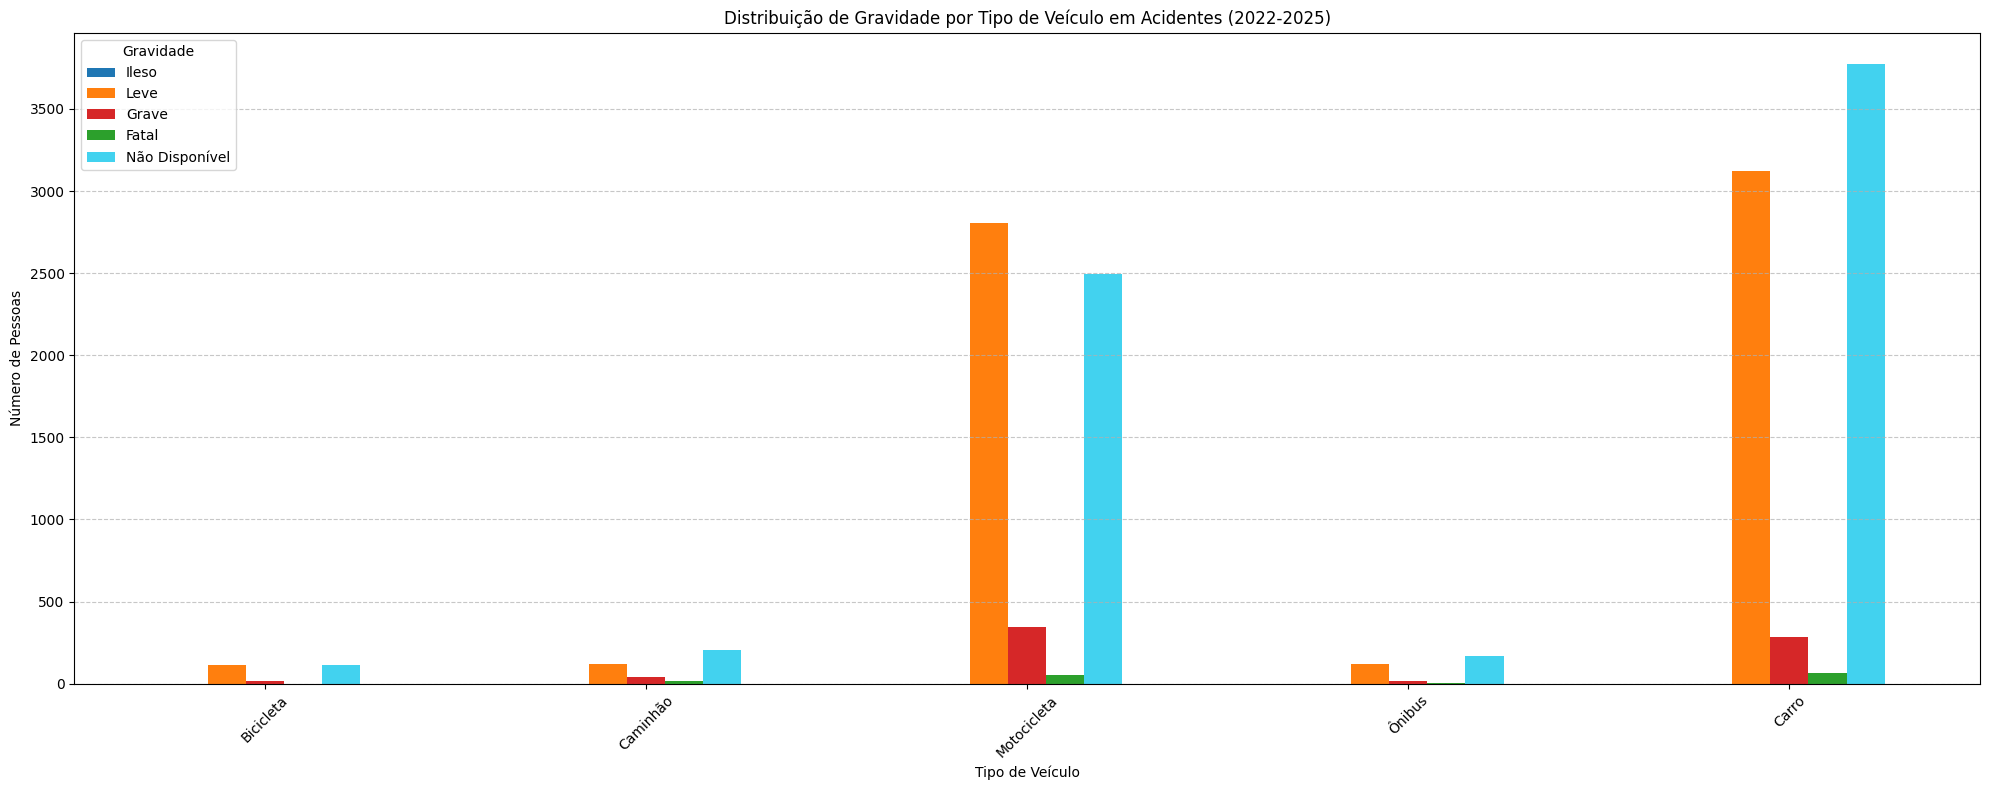

In [107]:
# Lista de tipos de veículos (colunas tp_veiculo_*)
tipos_veiculos = ["tp_veiculo_bicicleta", "tp_veiculo_caminhao", "tp_veiculo_motocicleta", 
                  "tp_veiculo_onibus", "tp_veiculo_automovel"]

# Lista de gravidades
gravidades = ["gravidade_ileso", "gravidade_leve", "gravidade_grave", "gravidade_fatal", "gravidade_nao_disponivel"]

# Criar dicionário para armazenar os dados da tabela
tabela_dados = {tipo: {grav: 0 for grav in gravidades} for tipo in tipos_veiculos}

# Preencher a tabela com as somas das gravidades por tipo de veículo
for tipo in tipos_veiculos:
    # Filtrar acidentes onde o tipo de veículo está presente
    acidentes_tipo = sinistros[sinistros[tipo] > 0]
    # Somar as gravidades
    for grav in gravidades:
        tabela_dados[tipo][grav] = acidentes_tipo[grav].sum()

# Criar DataFrame para a tabela
tabela = pd.DataFrame(tabela_dados).T
tabela.columns = ["Ileso", "Leve", "Grave", "Fatal", "Não Disponível"]
tabela.index = ["Bicicleta", "Caminhão", "Motocicleta", "Ônibus", "Carro"]

# Exibir a tabela
print(tabela)

# Criar gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 8))
tabela.plot(kind="bar", ax=ax, 
            color=["#1f77b4", "#ff7f0e", "#d62728", "#2ca02c", "#42d2ef"])
ax.set_xlabel("Tipo de Veículo")
ax.set_ylabel("Número de Pessoas")
ax.set_title("Distribuição de Gravidade por Tipo de Veículo em Acidentes (2022-2025)")
ax.legend(title="Gravidade")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Carro e Moto apresentam os maiores índices de acidentes
- As maiores taxas de acidentes graves e fatais envolvem carros e motos

## Gravidade por Faixa Etária

gravidade_lesao           FATAL  GRAVE  LEVE  NAO DISPONIVEL
faixa_etaria_demografica                                    
00 a 04                       1      2    22              15
05 a 09                       1      5    32               7
10 a 14                       0     10    68              14
15 a 19                       5     30   328             108
20 a 24                      19     82   960             452
25 a 29                       7     85   694             459
30 a 34                      14     60   485             501
35 a 39                      16     54   426             543
40 a 44                      10     44   386             580
45 a 49                      12     40   306             478
50 a 54                       7     21   179             394
55 a 59                       8     24   155             305
60 a 64                       8     20   105             243
65 a 69                      13      6    74             177
70 a 74                 

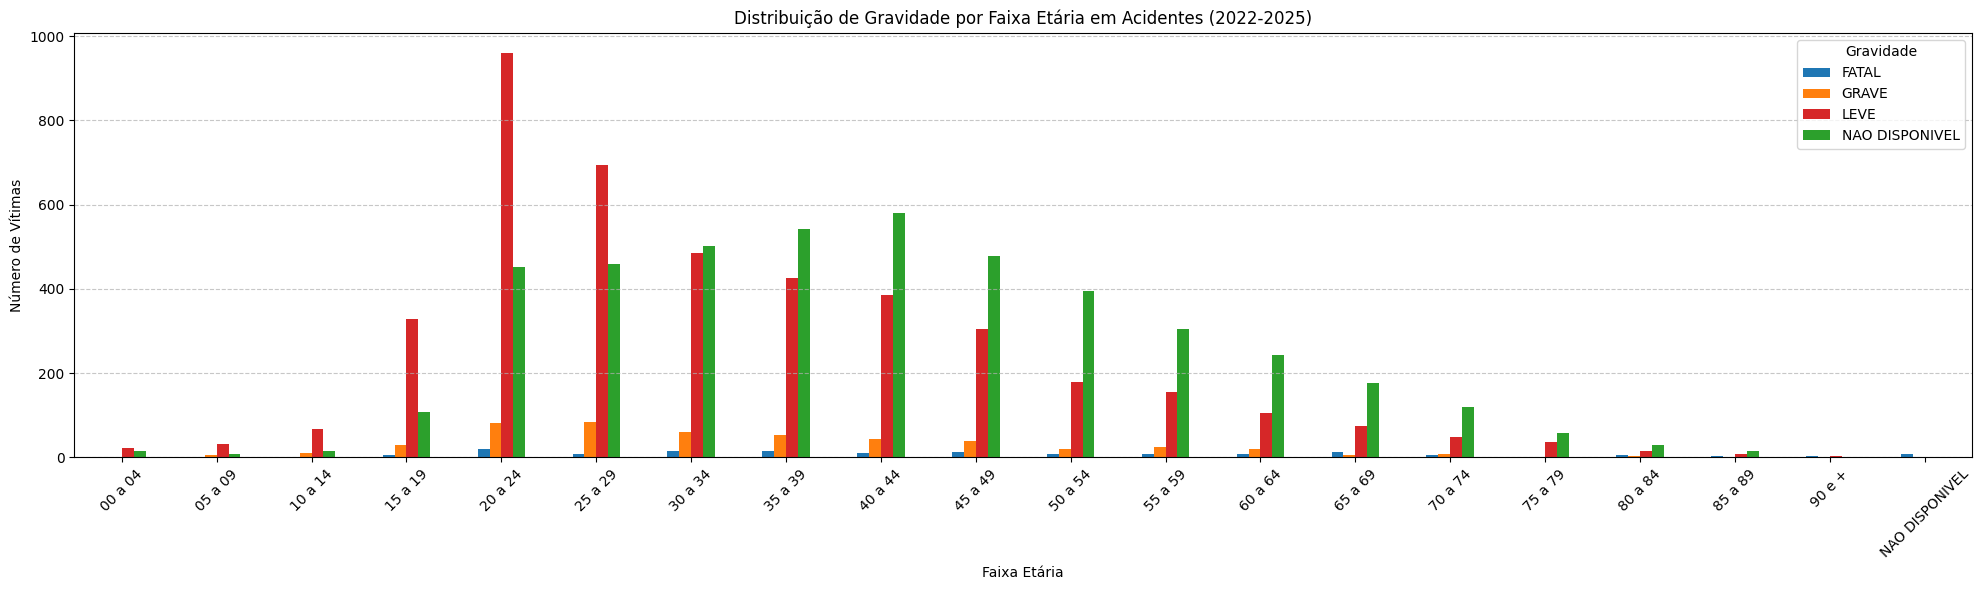

In [108]:
# Criar tabela cruzada entre faixa etária e gravidade
gravidade_idade = pd.crosstab(pessoas["faixa_etaria_demografica"], pessoas["gravidade_lesao"])
print(gravidade_idade)

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(20, 6))
gravidade_idade.plot(kind="bar", ax=ax, 
            color=["#1f77b4", "#ff7f0e", "#d62728", "#2ca02c"])
ax.set_xlabel("Faixa Etária")
ax.set_ylabel("Número de Vítimas")
ax.set_title("Distribuição de Gravidade por Faixa Etária em Acidentes (2022-2025)")
ax.legend(title="Gravidade")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Elevado pico de indice de acidentes na faixa etária de 20 a 24 anos


## Tipo de Via e Gravidade

gravidade_lesao  FATAL  GRAVE  LEVE
tipo_via                           
RODOVIAS            55    142   591
VIAS MUNICIPAIS     83    353  3740


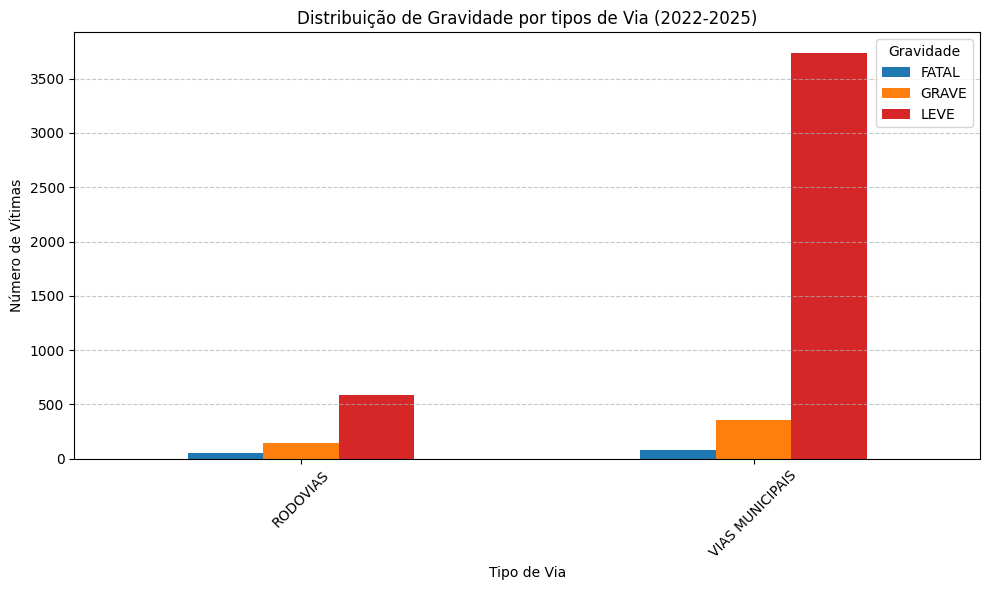

In [109]:
via_gravidade = pd.crosstab(pessoas["tipo_via"], pessoas["gravidade_lesao"])
via_gravidade = via_gravidade.drop("NAO DISPONIVEL", axis=1)
via_gravidade = via_gravidade.drop("NAO DISPONIVEL", axis=0)
print(via_gravidade)

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
via_gravidade.plot(kind="bar", ax=ax, 
            color=["#1f77b4", "#ff7f0e", "#d62728", "#2ca02c"])
ax.set_xlabel("Tipo de Via")
ax.set_ylabel("Número de Vítimas")
ax.set_title("Distribuição de Gravidade por tipos de Via (2022-2025)")
ax.legend(title="Gravidade")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Número de acidentes em vias municipais é muito maior do que em rodovias
- Índice de acidentes de todas as gravidades naturalmente é maior em vias municipais

## Localização Geográfica de pontos críticos

In [110]:
coordenadas = sinistros.copy()

# Filtrar linhas com latitude e longitude válidas
coordenadas = coordenadas.dropna(subset=["latitude", "longitude"])

# Convert latitude/longitude from string to float (handling comma as decimal separator)
coordenadas["latitude"] = coordenadas["latitude"].str.replace(",", ".").astype(float)
coordenadas["longitude"] = coordenadas["longitude"].str.replace(",", ".").astype(float)

# Criar mapa centrado em Bauru
mapa = folium.Map(location=[-22.3147, -49.0610], zoom_start=12, tiles="cartodbpositron")

# Criar cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Adicionar pontos ao cluster
for index, row in coordenadas.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        icon=None,  # Usar ícone padrão para reduzir overhead
        popup=None  # Remover pop-ups para minimizar dados
    ).add_to(marker_cluster)

# Salvar mapa em HTML
output_file = "mapa_acidentes_ otimizado.html"
mapa.save(output_file)

- Nações unidas possui bastante pontos críticos